## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : SkinThicknessTriceps 피부 주름 두께 (mm)
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터 로드

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
# 위에서 5개만 미리보기 합니다.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
cols = df.columns.tolist()

for c in cols:
    print(c)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [5]:
# info로 데이터타입, 결측치, 메모리 사용량 등의 정보를 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# 결측치를 봅니다.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# 예측을 합니다.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# 가장 마지막에 있는 Outcome 은 label 값이기 때문에 제외하고 
# 학습과 예측에 사용할 컬럼을 만들어 줍니다.
feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 결측치 시각화
값을 요약해 보면 최솟값이 0으로 나오는 값들이 있습니다. 0이 나올 수 있는 값도 있지만 인슐린이나 혈압 등의 값은 0값이 결측치라고 볼 수 있을 것입니다. 
따라서 0인 값을 결측치로 처리하고 시각화 해봅니다.

In [9]:
# 결측치 여부를 나타내는 데이터프레임을 만듭니다.
# 0값을 결측치라 가정하고 정답(label, target)값을 제외한 컬럼에 대해 
# 결측치 여부를 구해서 df_null 이라는 데이터프레임에 담습니다.
df_null = df[feature_columns].replace(0, np.nan).isnull()
df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,False,False,False,False,True,False,False,False
1,False,False,False,False,True,False,False,False
2,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False


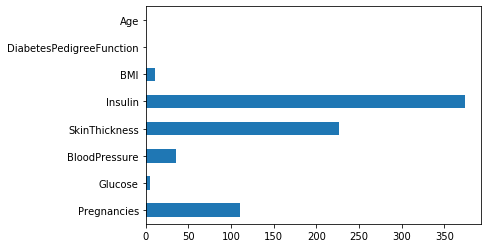

In [10]:
# 결측치의 갯수를 구해 막대 그래프로 시각화 합니다.
df_null.sum().plot.barh()

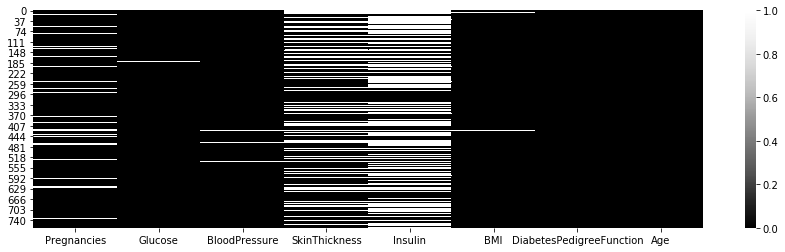

In [11]:
# 결측치를 heatmap 으로 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.heatmap(df_null, cmap="Greys_r")

## 정답값
* target, label 이라고 부르기도 합니다.

In [12]:
# 정답값인 Outcome 의 갯수를 봅니다.
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
# 다른 변수와 함께 봅니다.
# 임신횟수와 정답값을 비교해 봅니다.
# "Pregnancies", "Outcome"를 groupby 로 그룹화 해서 Outcome 에 대한 비율을 구합니다.
# 결과를 df_po라는 변수에 저장합니다.
df_po = df.groupby(["Pregnancies"], as_index=False)["Outcome"].mean()
df_po

,Pregnancies,Outcome
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


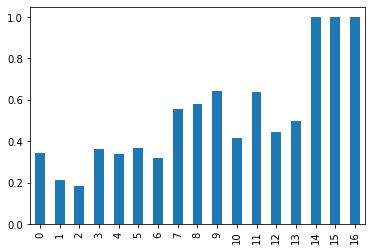

In [14]:
# 임신횟수에 따른 당뇨병 발병 비율
df_po["Outcome"].plot.bar()

## countplot

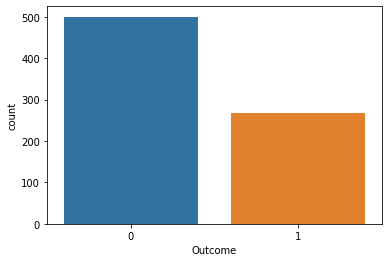

In [15]:
# 위에서 구했던 당뇨병 발병 비율을 구해봅니다.
# 당뇨병 발병 빈도수를 비교 합니다.
sns.countplot(data=df, x="Outcome")

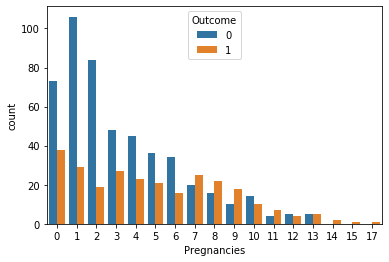

In [16]:
# 임신횟수에 따른 당뇨병 발병 빈도수를 비교합니다.
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

## barplot
* 기본 설정으로 시각화 하면 y축에는 평균을 추정해서 그리게 됩니다.

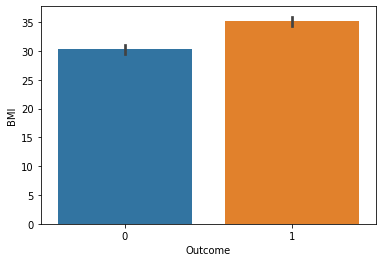

In [17]:
# 당뇨병 발병에 따른 BMI 수치를 비교합니다.
sns.barplot(data=df, x="Outcome", y="BMI")

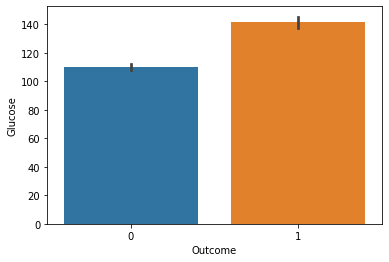

In [18]:
# 당뇨병 발병에 따른 포도당(Glucose)수치를 비교합니다.
sns.barplot(data=df, x="Outcome", y="Glucose")

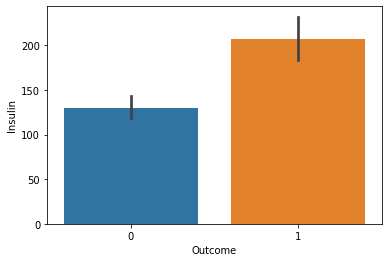

In [19]:
# Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병을 비교합니다.
sns.barplot(data=df[df["Insulin"] > 0], x="Outcome", y="Insulin")

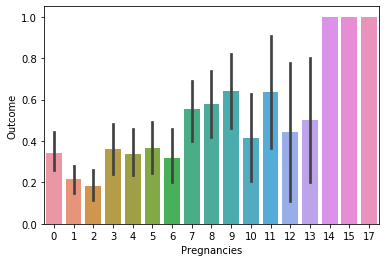

In [20]:
# 임심횟수에 대해서 당뇨병 발병 비율을 비교합니다.
sns.barplot(data=df, x="Pregnancies", y="Outcome")

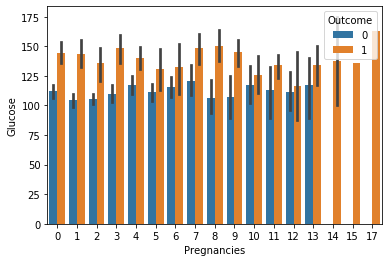

In [21]:
# 임신횟수(Pregnancies)에 따른 포도당(Glucose)수치를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")

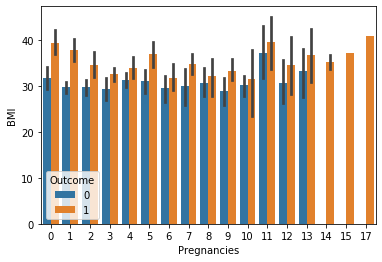

In [22]:
# 임신횟수(Pregnancies)에 따른 체질량지수(BMI)를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")

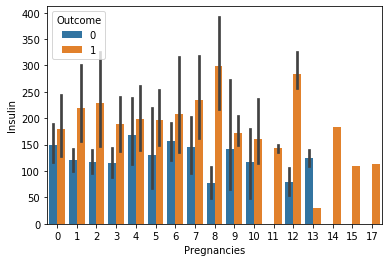

In [23]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그립니다.

sns.barplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

## boxplot

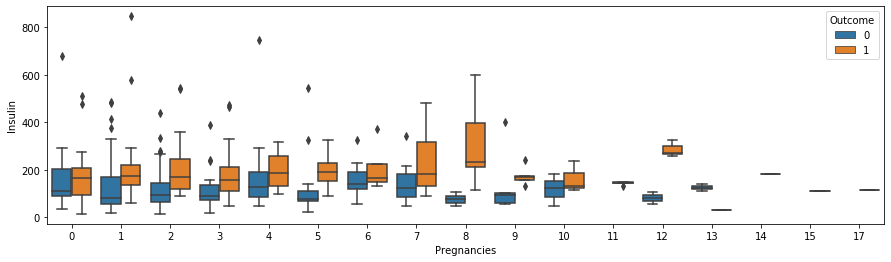

In [24]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그립니다.
plt.figure(figsize=(15, 4))
sns.boxplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

## violinplot

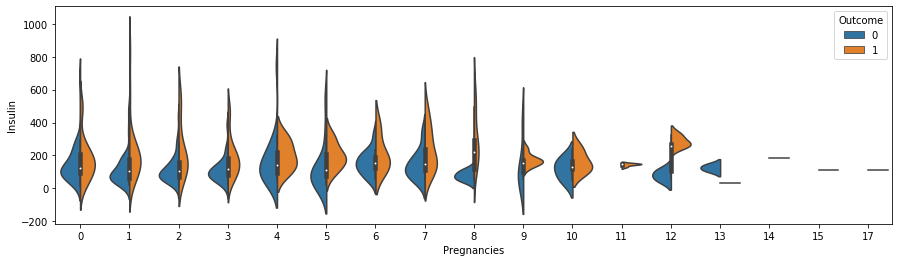

In [25]:
# 위의 그래프를 violinplot 으로 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.violinplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome", split=True)

## swarmplot

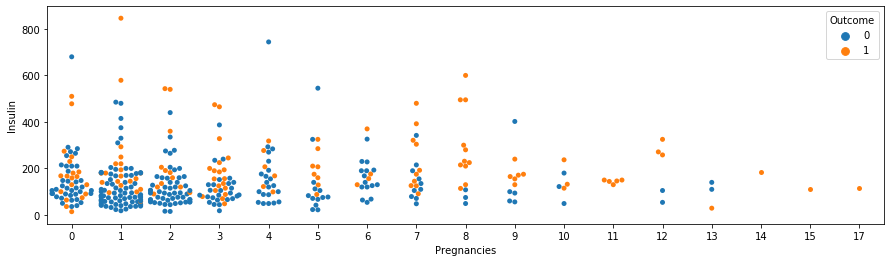

In [26]:
# 위의 그래프를 swarmplot 으로 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

## distplot

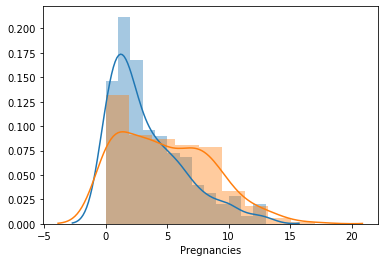

In [27]:
# 임신횟수에 따른 당뇨병 발병 여부를 시각화 합니다.
sns.distplot(df.loc[df["Outcome"]==0, "Pregnancies"])
sns.distplot(df.loc[df["Outcome"]==1, "Pregnancies"])

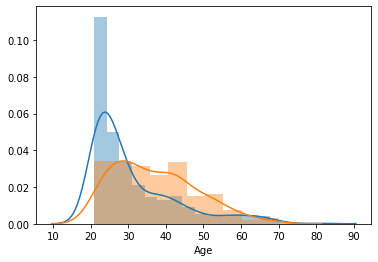

In [28]:
# 나이에 따른 당뇨병 발병 여부를 시각화 합니다.
sns.distplot(df.loc[df["Outcome"]==0, "Age"])
sns.distplot(df.loc[df["Outcome"]==1, "Age"])

## Subplots

### Pandas 를 통한 histplot 그리기
* pandas를 사용하면 모든 변수에 대한 서브플롯을 한 번에 그려줍니다.

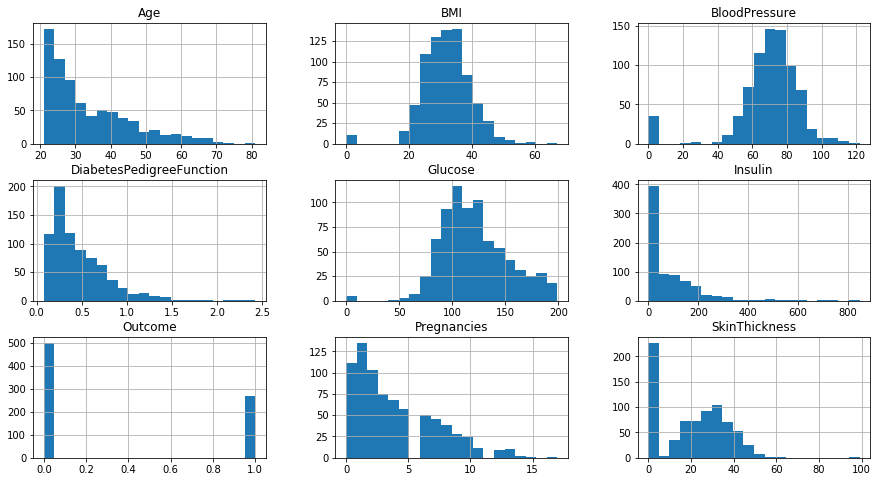

In [29]:
h = df.hist(bins=20, figsize=(15, 8))

### 반복문을 통한 서브플롯 그리기
#### distplot

In [30]:
# 컬럼의 수 만큼 for 문을 만들어서 서브플롯으로 시각화를 합니다.
df.columns.shape

(9,)

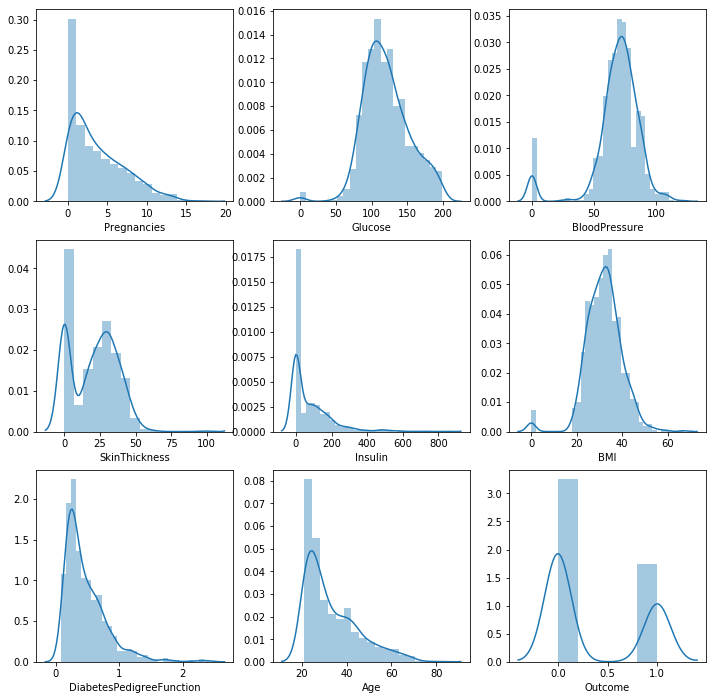

In [31]:
col_num = 3
fig, axes = plt.subplots(nrows=3, ncols=col_num, figsize=(12, 12))

for i, column in enumerate(df.columns):
    row = round( (i - 1) / col_num)
    col = i % col_num
    sns.distplot(df[column], ax=axes[row][col])

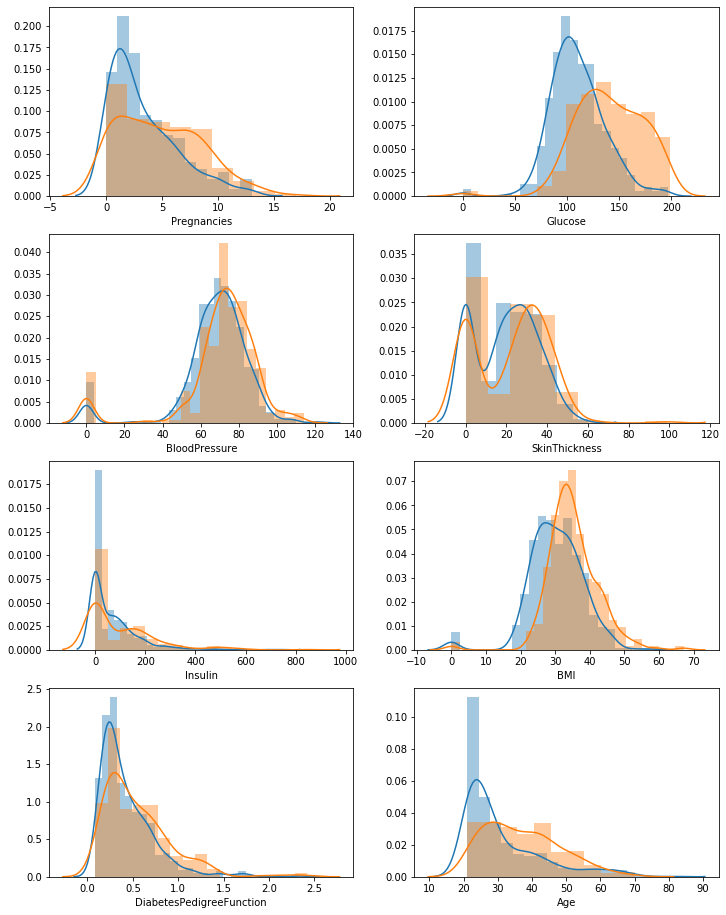

In [32]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(12, 16)

for i in range(len(feature_columns)):
    column = df.columns[i]
    row = int( i / 2)
    col = i % 2
    sns.distplot(df.loc[df["Outcome"] == 0, column], ax=axes[row][col])
    sns.distplot(df.loc[df["Outcome"] == 1, column], ax=axes[row][col])

#### violinplot

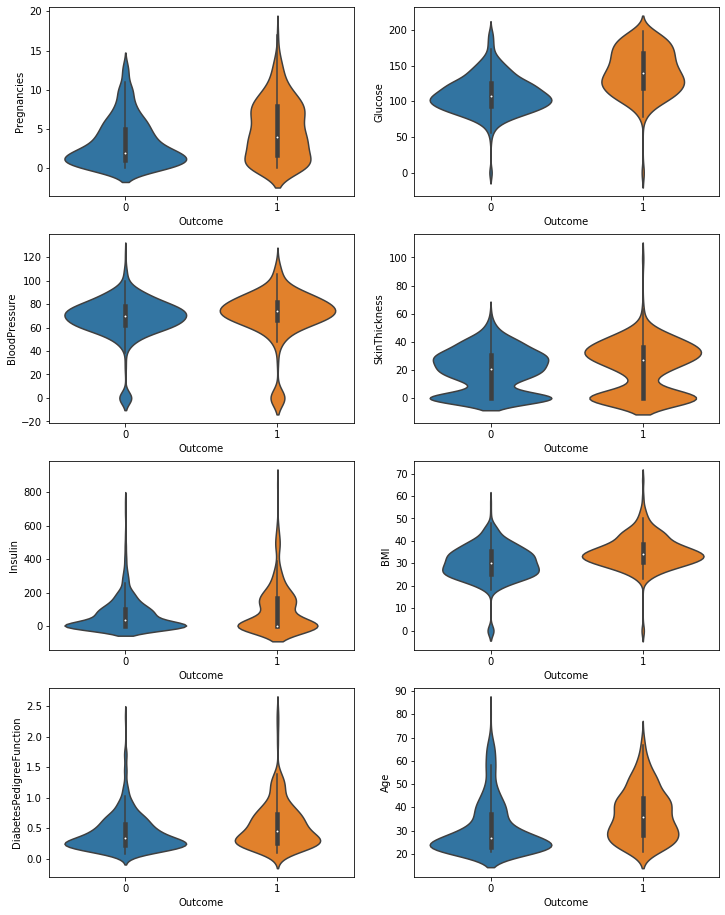

In [33]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(12, 16)

for i in range(len(feature_columns)):
    column = df.columns[i]
    row = int( i / 2)
    col = i % 2
    sns.violinplot(data = df, x="Outcome", y=column, ax=axes[row][col])

#### lmplot

* 상관계수가 높은 두 변수에 대해 시각화 합니다.

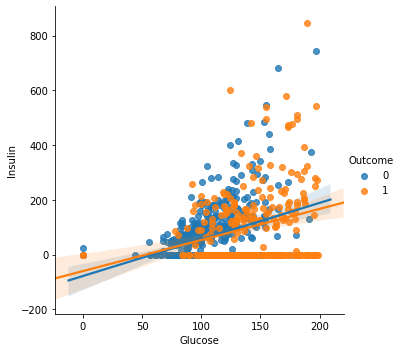

In [34]:
sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

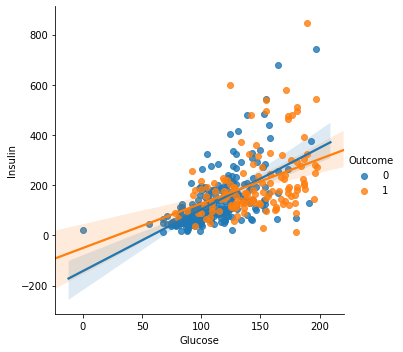

In [35]:
sns.lmplot(data=df[df["Insulin"] > 0], 
           x="Glucose", y="Insulin", hue="Outcome")

#### pairplot

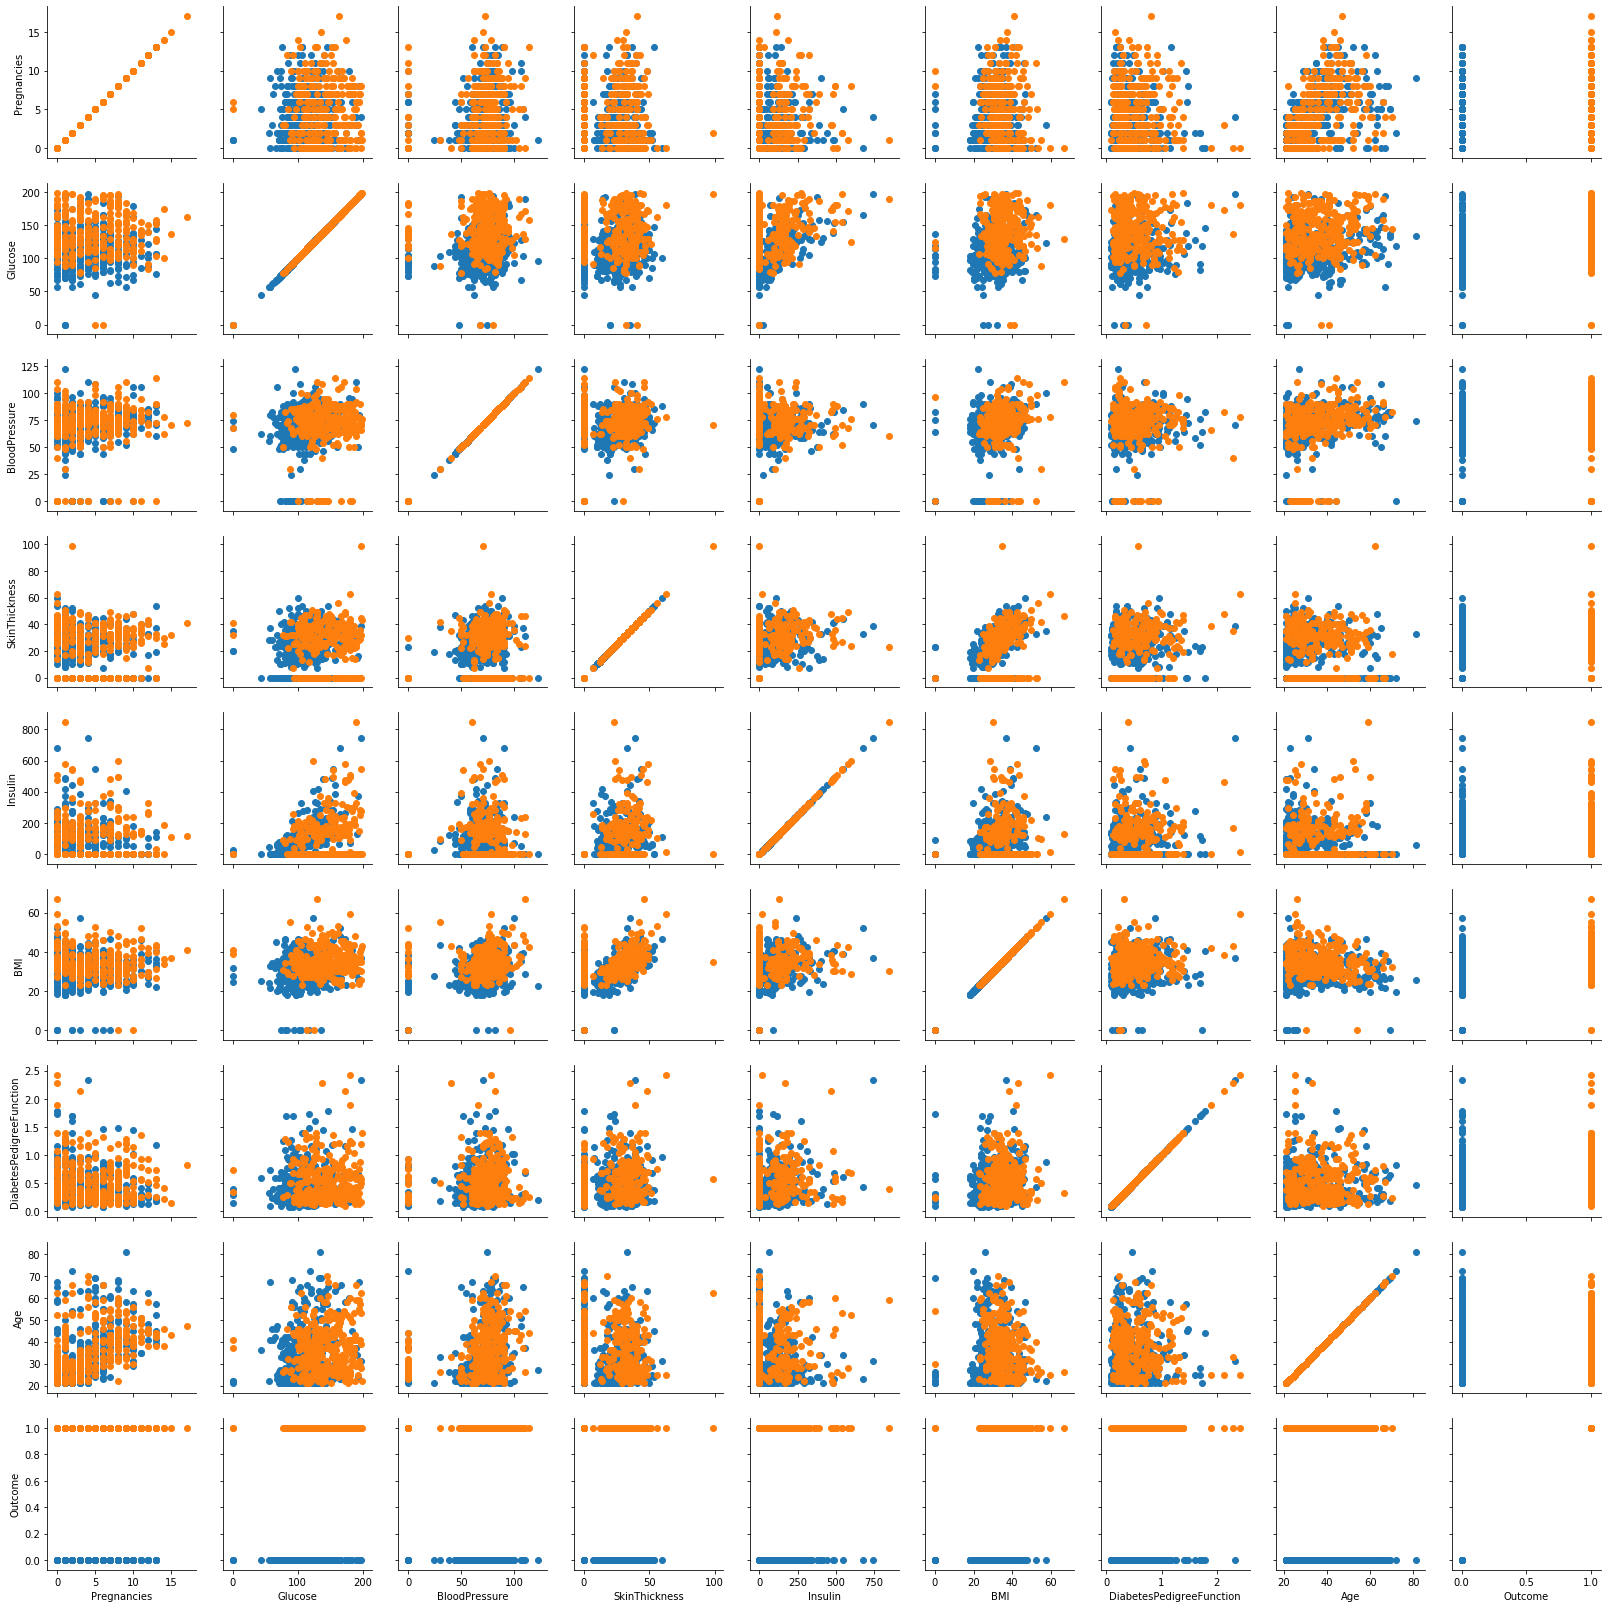

In [36]:
grid = sns.PairGrid(df, hue="Outcome")
grid.map(plt.scatter)

## 상관 분석
* [상관 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)


```
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

In [37]:
# 정답 값인 Outcome 을 제외 하고 feature 로 사용할 컬럼들에 대해 0을 결측치로 만들어 줍니다.
df_0 = df[feature_columns].replace(0, np.nan)
df_0["Outcome"] = df["Outcome"]
corr = df_0.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


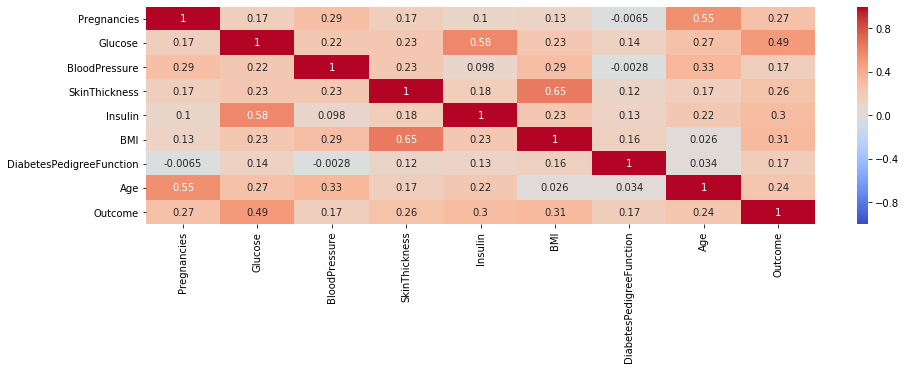

In [38]:
plt.figure(figsize=(15, 4))
sns.heatmap(corr, annot=True, fmt=".2g", vmax=1, vmin=-1, cmap="coolwarm")

In [39]:
corr["Outcome"]

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

### 상관계수가 높은 변수끼리 보기

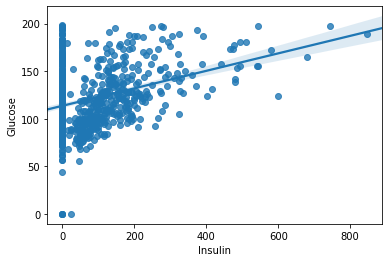

In [40]:
# Insulin 과 Glucose 로 regplot 그리기
sns.regplot(data=df, x="Insulin", y="Glucose")

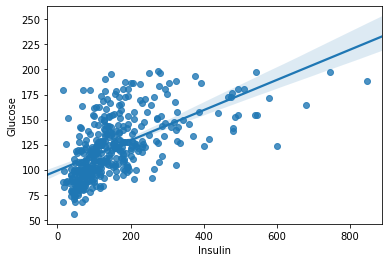

In [41]:
# df_0 으로 결측치 처리한 데이터프레임으로
# Insulin 과 Glucose 로 regplot 그리기
sns.regplot(data=df_0, x="Insulin", y="Glucose")

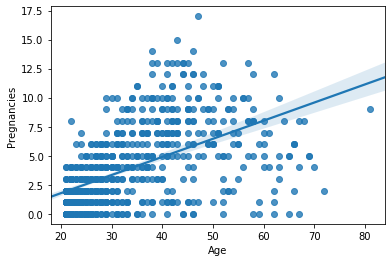

In [42]:
# Age 와 Pregnancies 로 regplot 그리기
sns.regplot(data=df, x="Age", y="Pregnancies")

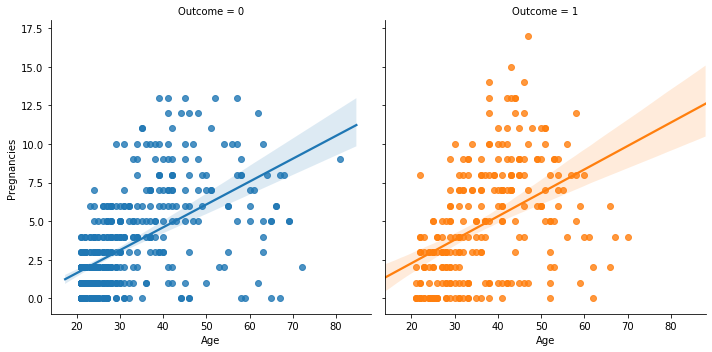

In [43]:
# Age 와 Pregnancies 로 lmplot 을 그리고 Outcome 에 따라 다른 색상으로 표현하기
sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")